# <center> Exploring Lunar Dataset

#Load Kaggle Datasets Directly into Google Colab

To download data from Kaggle, you need to authenticate with the Kaggle services. For this purpose, you need an API token. This token can be easily generated from the profile section of your Kaggle account. Simply, navigate to your Kaggle profile and then,

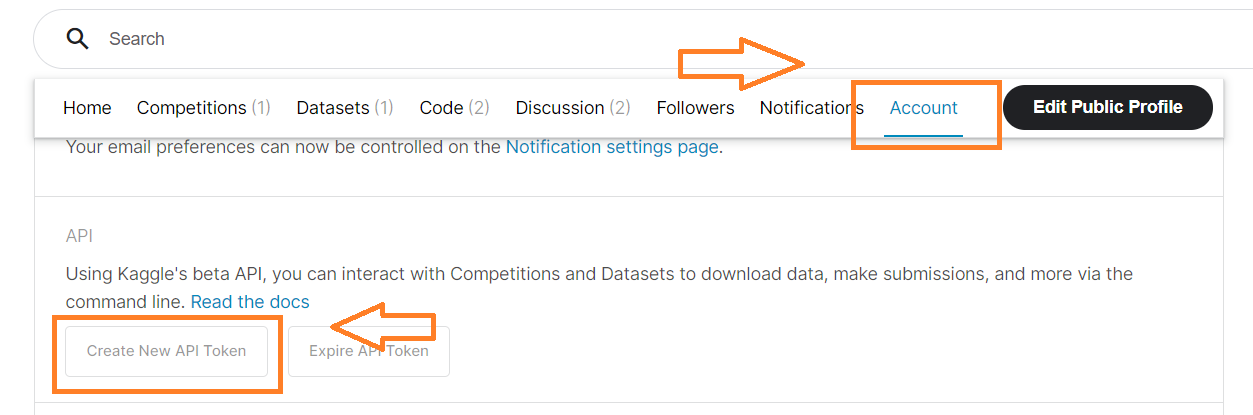

Click the Account tab and then scroll down to the API section (Screenshot from Kaggle profile)

Click on **Create New API Token**

A file named “kaggle.json” will be download which contains the username and the API key.

This is a one-time step and you don’t need to generate the credentials every time you download the dataset.

Upload the “kaggle.json” file that you just downloaded from Kaggle.

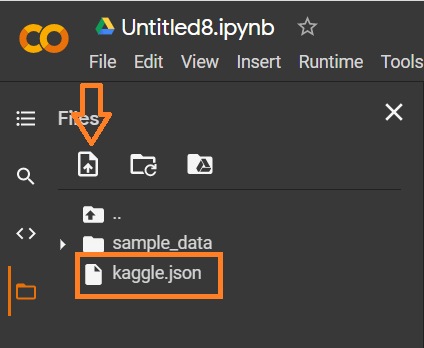

In [ ]:
# Install the Kaggle library
! pip install kaggle

In [ ]:
# Make a directory named “.kaggle”
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [ ]:
# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

The colab notebook is now ready to download datasets from Kaggle.

In [ ]:
# downloading the dataset
! kaggle datasets download -d romainpessia/artificial-lunar-rocky-landscape-dataset

100% 5.01G/5.02G [01:36<00:01, 11.0MB/s]
100% 5.02G/5.02G [01:36<00:00, 55.7MB/s]


In [ ]:
!ls

artificial-lunar-rocky-landscape-dataset.zip  kaggle.json  sample_data


Now unzip the dowloaded dataset

In [ ]:
!unzip artificial-lunar-rocky-landscape-dataset.zip

After unzip the folder structure of dataset will be like this:

    images
        clean [Contains the processed ground truth images after having applied morphological operations to eliminate the smallest rocks etc]
        ground [Contains all ground truth images, numbered to match the renders.]
        render [Contains all rendered images, randomly ordered.]

    real_moon_images: [Contains real lunar images. as well as their ground truth equivalent made to match the format of the ground truth for simulated images.]

    bounding_boxes.csv: [bounding boxes of all major rocks (colored in blue in ground truth images)]


## Import required libraries

In [ ]:
import os
import cv2
import glob
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
CLEAN_MASK_DIR_PATH = '/content/images/clean'
GROUND_MASK_DIR_PATH = '/content/images/ground'
RENDER_IMAGE_DIR_PATH = '/content/images/render'

clean_mask_paths = [os.path.join(CLEAN_MASK_DIR_PATH, x) for x in sorted(os.listdir(CLEAN_MASK_DIR_PATH))]
ground_mask_paths = [os.path.join(GROUND_MASK_DIR_PATH, x) for x in sorted(os.listdir(GROUND_MASK_DIR_PATH))]
render_image_paths = [os.path.join(RENDER_IMAGE_DIR_PATH, x) for x in sorted(os.listdir(RENDER_IMAGE_DIR_PATH))]

print("Total clean masks: ", len(clean_mask_paths), "\nTotal ground masks: ", len(ground_mask_paths), 
      "\nTotal render images: ", len(render_image_paths))

Total clean masks:  9766 
Total ground masks:  9766 
Total render images:  9766


In [ ]:
# Accessing from drive
CLEAN_MASK_DIR_PATH = '/content/drive/MyDrive/Lunar Rock Segmentation/data/images/clean'
GROUND_MASK_DIR_PATH = '/content/drive/MyDrive/Lunar Rock Segmentation/data/images/ground'
RENDER_IMAGE_DIR_PATH = '/content/drive/MyDrive/Lunar Rock Segmentation/data/images/render'

clean_mask_paths = [os.path.join(CLEAN_MASK_DIR_PATH, x) for x in sorted(os.listdir(CLEAN_MASK_DIR_PATH))]
ground_mask_paths = [os.path.join(GROUND_MASK_DIR_PATH, x) for x in sorted(os.listdir(GROUND_MASK_DIR_PATH))]
render_image_paths = [os.path.join(RENDER_IMAGE_DIR_PATH, x) for x in sorted(os.listdir(RENDER_IMAGE_DIR_PATH))]

clean_mask_paths = clean_mask_paths[0:3000]
ground_mask_paths = ground_mask_paths[0:3000]
render_image_paths = render_image_paths[0:3000]

len(clean_mask_paths), len(ground_mask_paths), len(render_image_paths)

(3000, 3000, 3000)

### Read image and display 

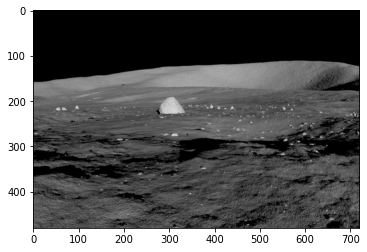

In [ ]:
# read and display render image
render_image = tf.io.read_file(render_image_paths[0])
render_image = tf.image.decode_jpeg(render_image, channels=3)
plt.imshow(render_image)
plt.show()

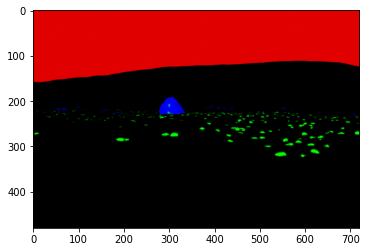

In [ ]:
# read and display ground mask
ground_mask = tf.io.read_file(ground_mask_paths[0])
ground_mask = tf.image.decode_jpeg(ground_mask, channels=3)
plt.imshow(ground_mask)
plt.show()

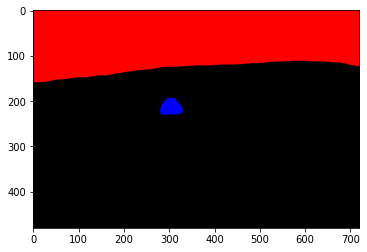

In [ ]:
# read and display clean mask
clean_mask = tf.io.read_file(clean_mask_paths[0])
clean_mask = tf.image.decode_jpeg(clean_mask, channels=3)
plt.imshow(clean_mask)
plt.show()

In [ ]:
# shape of images
print("Render image shape: ", render_image.shape, 
      "\nGround mask shape: ", ground_mask.shape, 
      "\nClean mask shape: ", clean_mask.shape)

Render image shape:  (480, 720, 3) 
Ground mask shape:  (480, 720, 3) 
Clean mask shape:  (480, 720, 3)


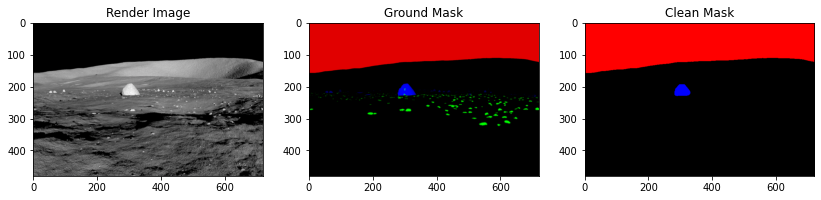

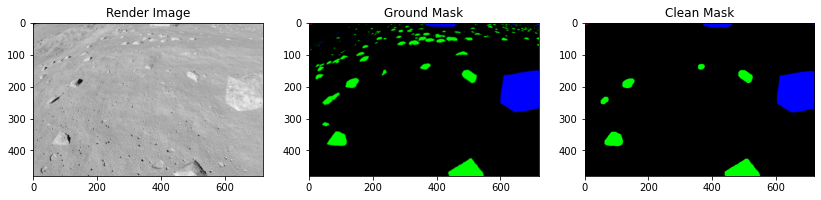

In [ ]:
# function to display sample images with corresponding mask
def display(display_list):
  plt.figure(figsize=(14, 14))

  title = ['Render Image', 'Ground Mask', 'Clean Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('on')
  plt.show()

for img, grnd_msk, cln_msk in zip(render_image_paths[0:2], ground_mask_paths[0:2], clean_mask_paths[0:2]):
    image = tf.io.read_file(img)
    image = tf.image.decode_jpeg(image, channels=3)

    ground_mask = tf.io.read_file(grnd_msk)
    ground_mask = tf.image.decode_jpeg(ground_mask, channels=3)

    clean_mask = tf.io.read_file(cln_msk)
    clean_mask = tf.image.decode_jpeg(clean_mask, channels=3)

    display([image, ground_mask, clean_mask])

In [ ]:
!pip install easyimages

In [5]:
from easyimages import EasyImageList

In [9]:
li = EasyImageList.from_folder('/content/drive/MyDrive/Lunar Rock Segmentation/data/images/render')
li.symlink_images()
li.html(sample=10, size=40)